# American Sign Language Recognition
### Machine Learning Model
+++++++++++++++++++++++++++++++++++++
### Objective
To classify image of american sign language recognition using machine learnnig models

+++++++++++++++++++++++++++++++++++++
### Machine Learning Process
- Loading data
- Exploring data (EDA)
- Image preprocessing
- Model building and tuning
- Model evaluating
- Performance evaluating on test set
- Prediction analysis

+++++++++++++++++++++++++++++++++++++

In [ ]:
#Connect data in Google Drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
!ls /gdrive/MyDrive/archive

american_sign_language.PNG  modelcheckpoints	 sign_mnist_train
amer_sign2.png		    sign_mnist_test	 sign_mnist_train.csv
amer_sign3.png		    sign_mnist_test.csv


## librarie used

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



#image Pre-process
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import cv2
import string
asl_char = list(string.ascii_lowercase)
asl_char.sort()
asl_char

#Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#Finding best model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, truncnorm, randint

#Model performance matrics
from sklearn.metrics import confusion_matrix,precision_score,f1_score
from sklearn import metrics
from sklearn.metrics import classification_report



## Loading Data

In [ ]:
BASE_PATH = "/gdrive/MyDrive/archive/"
train = pd.read_csv(BASE_PATH+'sign_mnist_train.csv')
test = pd.read_csv(BASE_PATH+'sign_mnist_test.csv')

## Exploring Data Analysis

In [ ]:
print(f"Training size:", train.shape)
print(f"Testing size:", test.shape)


Training size: (27455, 785)
Testing size: (7172, 785)


In [ ]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [ ]:
#summing the number of na in the training set for each column
print(sum(train.isna().sum()))

#summing the number of na in the test set for each column
print(sum(test.isna().sum()))

0
0


Text(0.5, 1.0, 'Distrubition of Labels in the Train Set')

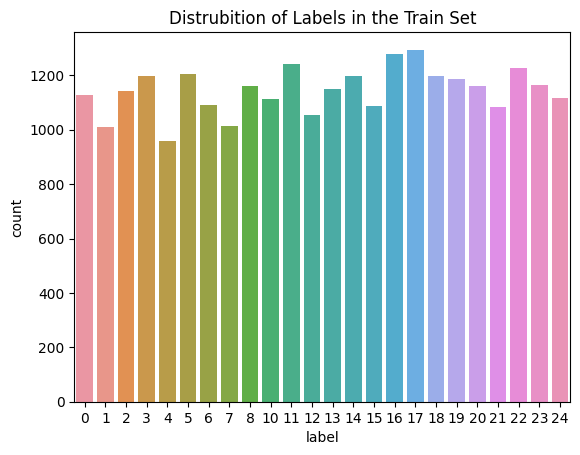

In [ ]:
#Plot the distribution for training set
sns.countplot(x = train['label']).set_title("Distrubition of Labels in the Train Set")


Text(0.5, 1.0, 'Distrubition of Labels in the Test Set')

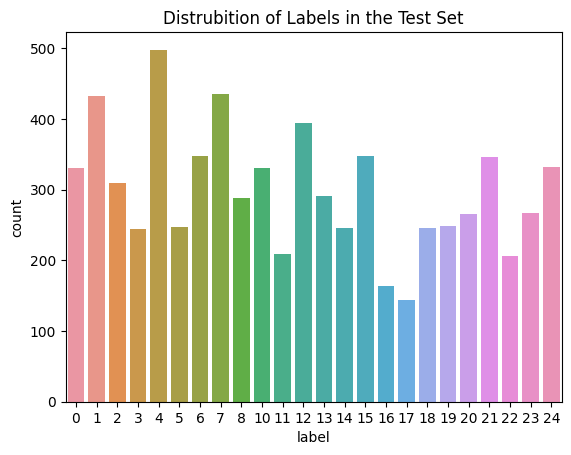

In [ ]:
#Plot the distribution for test set
sns.countplot(x = test['label']).set_title("Distrubition of Labels in the Test Set")


## Data pre-processing

### Spliting data

In [ ]:
#creating Y_train
Y_train = train["label"]

#creating X_train
X_train = train.drop(labels = ["label"],axis = 1) 

In [ ]:
#creating y_test
y_test = test["label"]

#creating x_test
x_test = test.drop(labels = ["label"],axis = 1) 

### Reshaping the image size
The images will need to be reshaped in order feed into our model. The images will be 28x28 and grey scale

In [ ]:
X_train = X_train.values.reshape(-1,28,28)
x_test = x_test.values.reshape(-1,28,28)
print(X_train.shape)
print(x_test.shape)

(27455, 28, 28)
(7172, 28, 28)


In [ ]:
#Rescal to 0-1
X_train = np.array(X_train)
X_train = X_train/ 255.0

#Rescale X_test
x_test = np.array(x_test)
x_test = x_test/ 255.0

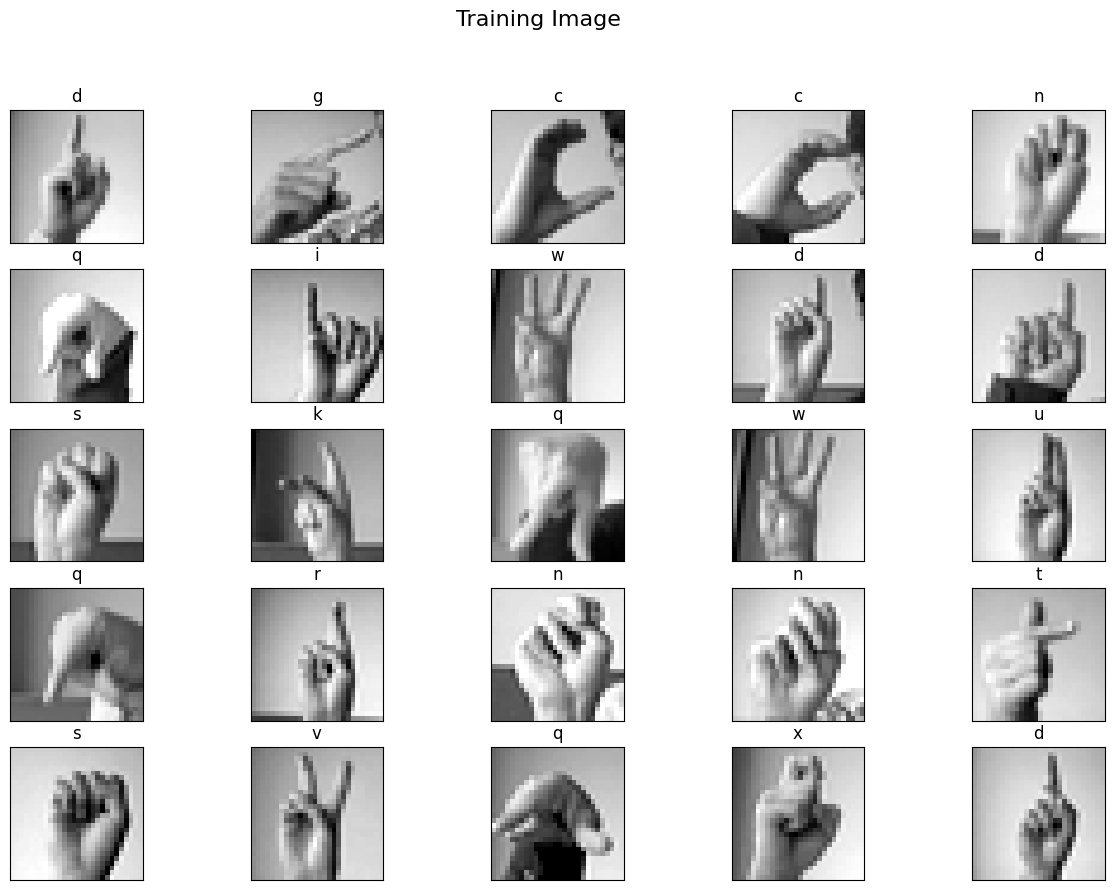

In [ ]:
label_map = asl_char
#Training Image
#creating a 5x5 grid of the first 25 photos in the training images
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})
fig.suptitle('Training Image', fontsize=16)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(label_map[Y_train[i]])
plt.show()

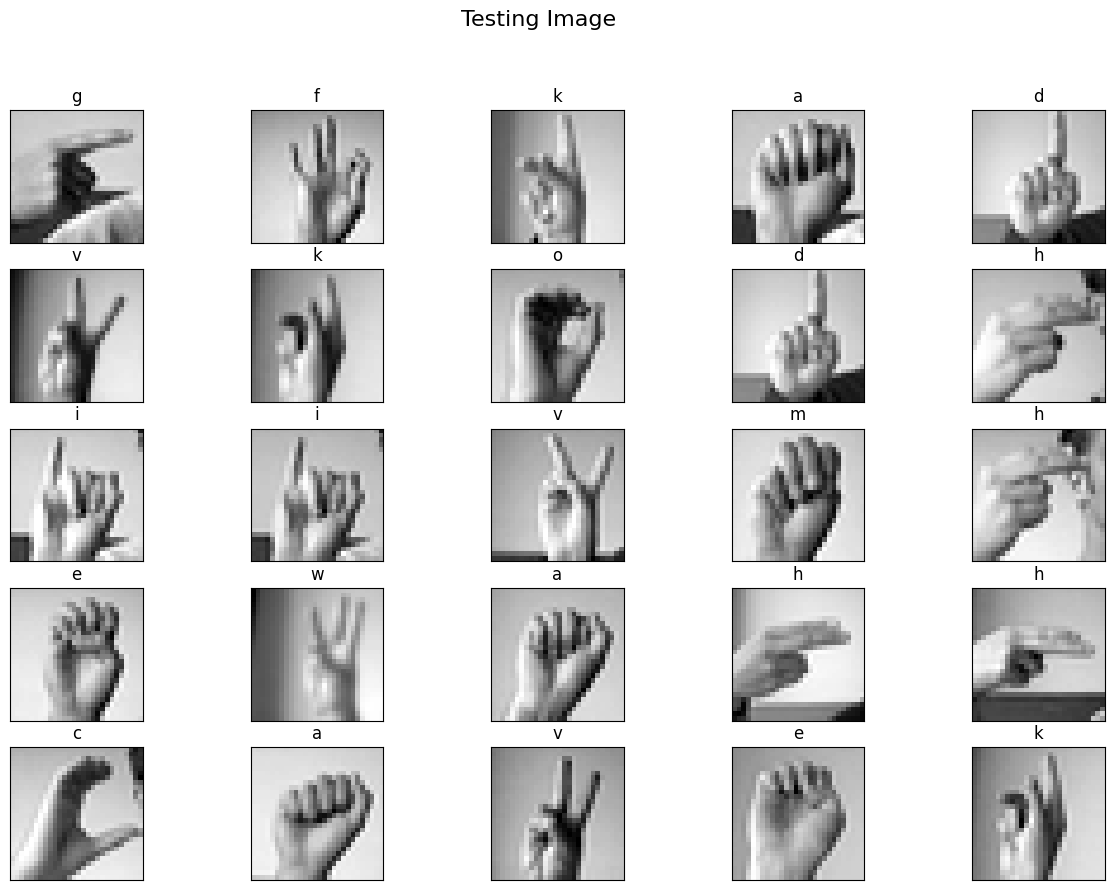

In [ ]:
#Test Image
#creating a 5x5 grid of the first 25 photos in the training images
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})
fig.suptitle('Testing Image', fontsize=16)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(label_map[y_test[i]])
plt.show()

### image pre-processing

In [ ]:

#Develop pre-processing image
prepocessed_X_train = []
def highpass(img, sigma):
    return (img - cv2.GaussianBlur(img, (0,0),3) + 127)


def preprocess(img):
  img = cv2.equalizeHist((img*255).astype(np.uint8))
  # get highpass filter 
  img = highpass(img,3)

  f = np.fft.fft2(img)
  fshift = np.fft.fftshift(f)
  magnitude_spectrum = np.log(np.abs(fshift))
  return magnitude_spectrum

for i in range(X_train.shape[0]):
  img = X_train[i]
  magnitude_spectrum = preprocess(img)
  prepocessed_X_train.append(
      magnitude_spectrum
  )

prepocessed_X_train = np.array(prepocessed_X_train)

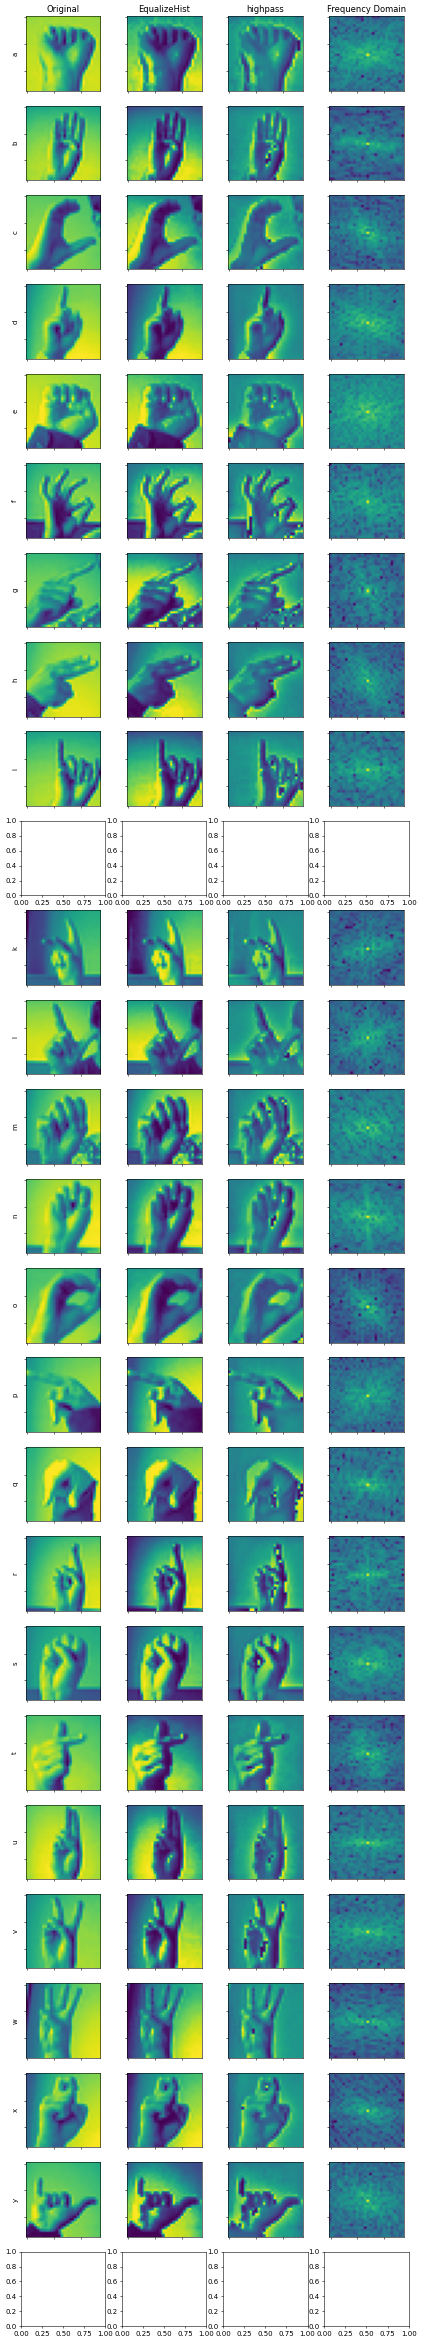

In [ ]:
# Visualize Pre-processing step with all alphabets

fig,axes = plt.subplots(26,4,figsize=(10,60),dpi=50)

for class_,axes_row in enumerate(axes):
  if class_==9 or class_==25:
    continue
  label = label_map[class_]
  # print(class_)
  base_img = X_train[Y_train==class_,:,:][0]
  eq_img = cv2.equalizeHist((base_img*255).astype(np.uint8))
  hp_img = highpass(eq_img,3)

  #mag spec
  f = np.fft.fft2(hp_img)
  fshift = np.fft.fftshift(f)

  magnitude_spectrum = np.log(np.abs(fshift))
  axes_row[0].imshow(base_img)
  axes_row[0].set_ylabel(label)
  axes_row[1].imshow(eq_img)
  axes_row[2].imshow(hp_img)
  axes_row[3].imshow(magnitude_spectrum)
  for k in range(4):
    axes_row[k].set_xticklabels([])
    axes_row[k].set_yticklabels([])

  if class_ == 0:
    axes_row[0].set_title("Original")
    axes_row[1].set_title("EqualizeHist")
    axes_row[2].set_title("highpass")

    axes_row[3].set_title("Frequency Domain")

In [ ]:
# Create a PCA instance
pca = PCA(n_components=3)

inputdata = prepocessed_X_train.reshape(prepocessed_X_train.shape[0],-1)/255.0

# Fit the data and obtain the transformed result
X_train_pca = pca.fit_transform(inputdata)
X_train_pca

array([[ 0.04992182, -0.00325365, -0.00817607],
       [-0.0144093 ,  0.02167631,  0.00370903],
       [ 0.02359741,  0.01104039, -0.01947453],
       ...,
       [ 0.03992087,  0.01168341, -0.00734354],
       [ 0.00180732, -0.00674787,  0.02704709],
       [-0.00518484,  0.00558717,  0.01845993]])

<Axes: >

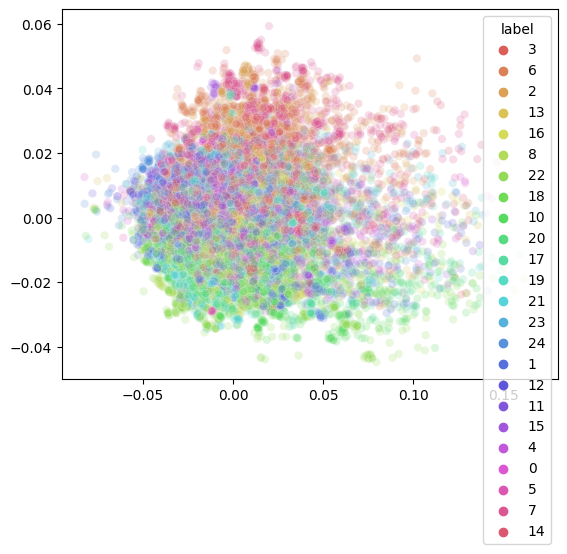

In [ ]:
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1],alpha = 0.2, hue = Y_train.astype(str),palette=sns.color_palette("hls", 24))

## Model Building

### Model1: Random Forest

In [ ]:
#Finding the best parameter for Randomforest

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, truncnorm, randint


model_params = {
    # randomly sample numbers from 4 to 500 estimators
    'n_estimators': randint(4,500),
    'max_depth': randint(3,5),
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    # uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
    'min_samples_split': uniform(0.01, 0.3)
}
clf = RandomizedSearchCV(RandomForestClassifier(), model_params, random_state=0,n_iter=10,n_jobs=-1)
clf.fit(X_train_pca,(Y_train))

print("Best parameters:", clf.best_params_)
print("Best score:", clf.best_score_)

Best parameters: {'max_depth': 4, 'max_features': 0.32029272553988275, 'min_samples_split': 0.04177228215633764, 'n_estimators': 155}
Best score: 0.24006556182844657


In [ ]:
#Train and predict the tunned model
lr = RandomForestClassifier(**clf.best_params_ )
print(clf.best_params_)
lr_trained = lr.fit(X_train_pca, Y_train)
y_pred = lr_trained.predict(X_train_pca)


{'max_depth': 4, 'max_features': 0.32029272553988275, 'min_samples_split': 0.04177228215633764, 'n_estimators': 155}


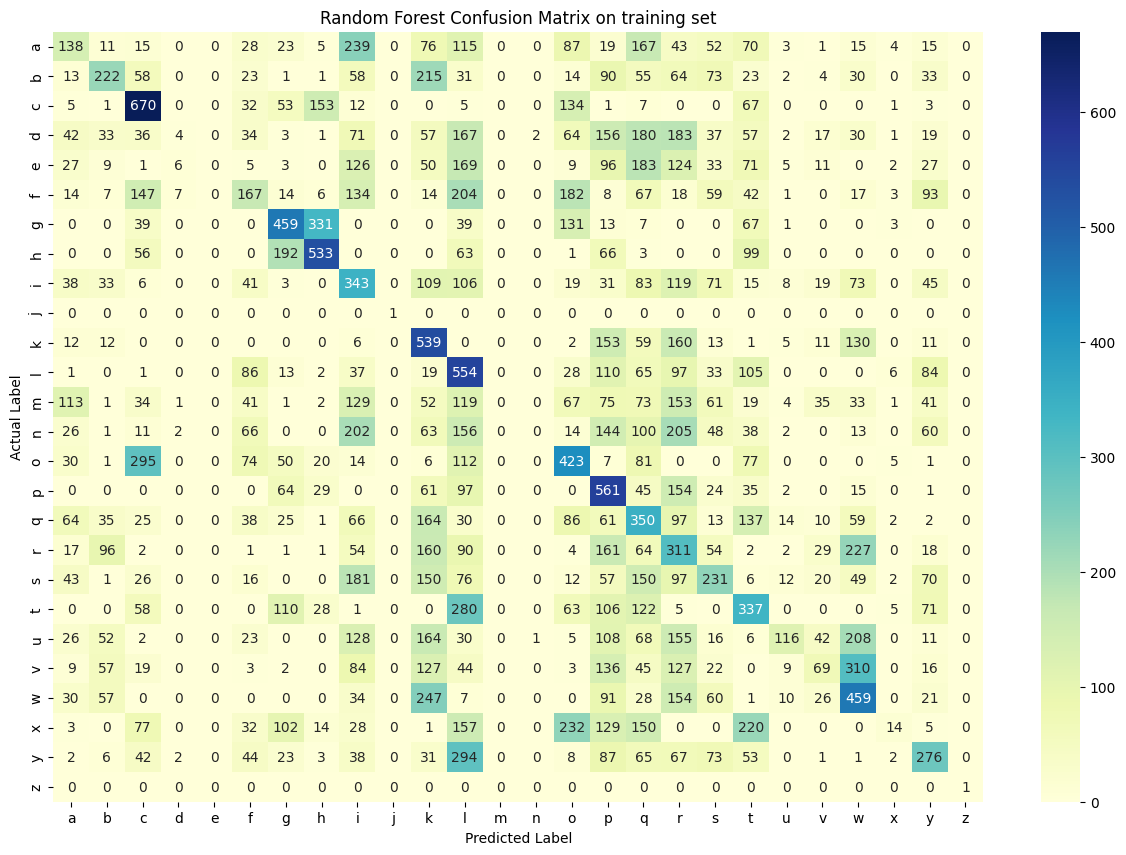

In [ ]:
#Confusion matrix

conf = confusion_matrix(Y_train.to_list()+[9,25], list(y_pred)+[9,25])
conf = pd.DataFrame(conf)
conf.index = asl_char
conf.columns = asl_char
plt.figure(figsize=(15,10))
sns.heatmap(conf, annot = True, cmap = "YlGnBu", fmt = 'd')
plt.title("Random Forest Confusion Matrix on training set")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()


### Model2: decision tree

In [ ]:
# Finding the best parameters for Decision tree
model_params = {
    "max_depth": randint(1, 10),
    "max_features": randint(1, 9),
    "min_samples_leaf": randint(1, 9),
    "criterion": ["gini", "entropy"]
}
# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()
clf = RandomizedSearchCV(tree, model_params, random_state=0,n_iter=10,n_jobs=-1)
clf.fit(X_train_pca, Y_train)

print("Best parameters for decision tree:", clf.best_params_)
print("Best score for decision tree:", clf.best_score_)

Best parameters for decision tree: {'criterion': 'entropy', 'max_depth': 9, 'max_features': 2, 'min_samples_leaf': 5}
Best score for decision tree: 0.37767255509014747


{'criterion': 'entropy', 'max_depth': 9, 'max_features': 2, 'min_samples_leaf': 5}


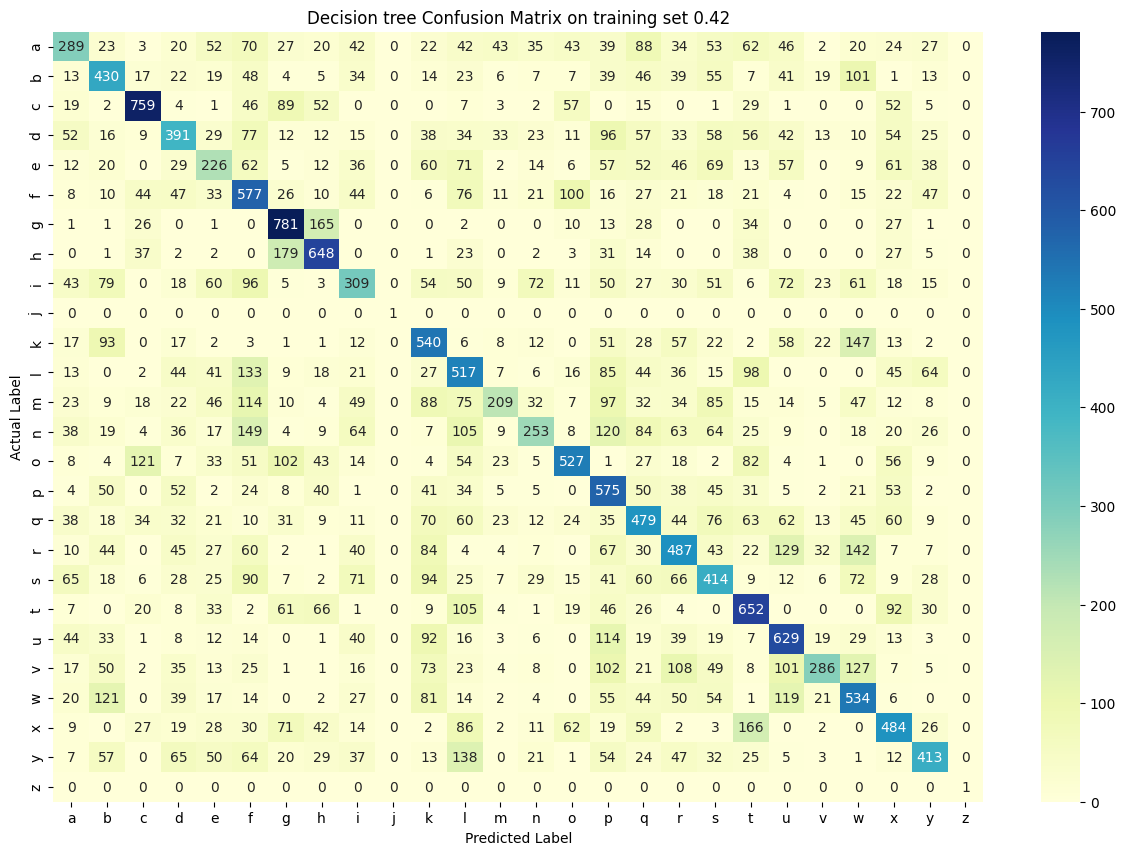

In [ ]:
#Train and predict the tunned model
print(clf.best_params_)
tree = DecisionTreeClassifier(**clf.best_params_ )
tree.fit(X_train_pca, Y_train)
y_pred = tree.predict(X_train_pca)
#Confusion matrix

conf2 = confusion_matrix(Y_train.to_list()+[9,25], list(y_pred)+[9,25])
conf2 = pd.DataFrame(conf2)
conf2.index = asl_char
conf2.columns = asl_char


accuracy = np.sum(y_pred==Y_train)/y_pred.shape[0]
plt.figure(figsize=(15,10))
sns.heatmap(conf2, annot = True, cmap = "YlGnBu", fmt = 'd')



plt.title(f"Decision tree Confusion Matrix on training set {accuracy:.2f}")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
# add eval code for tree and rf on train and test
plt.show()

## Performance Evaluation on Test Set

### Model1: Random forest

In [ ]:
# get preprocessed input 
prepocessed_x_test = []
for i in range(x_test.shape[0]):
  img = x_test[i]
  magnitude_spectrum = preprocess(img)
  prepocessed_x_test.append(
      magnitude_spectrum
  )

prepocessed_x_test = np.array(prepocessed_x_test)
inputdata = prepocessed_x_test.reshape(prepocessed_x_test.shape[0],-1)/255.0
x_test_pca = pca.transform(inputdata)


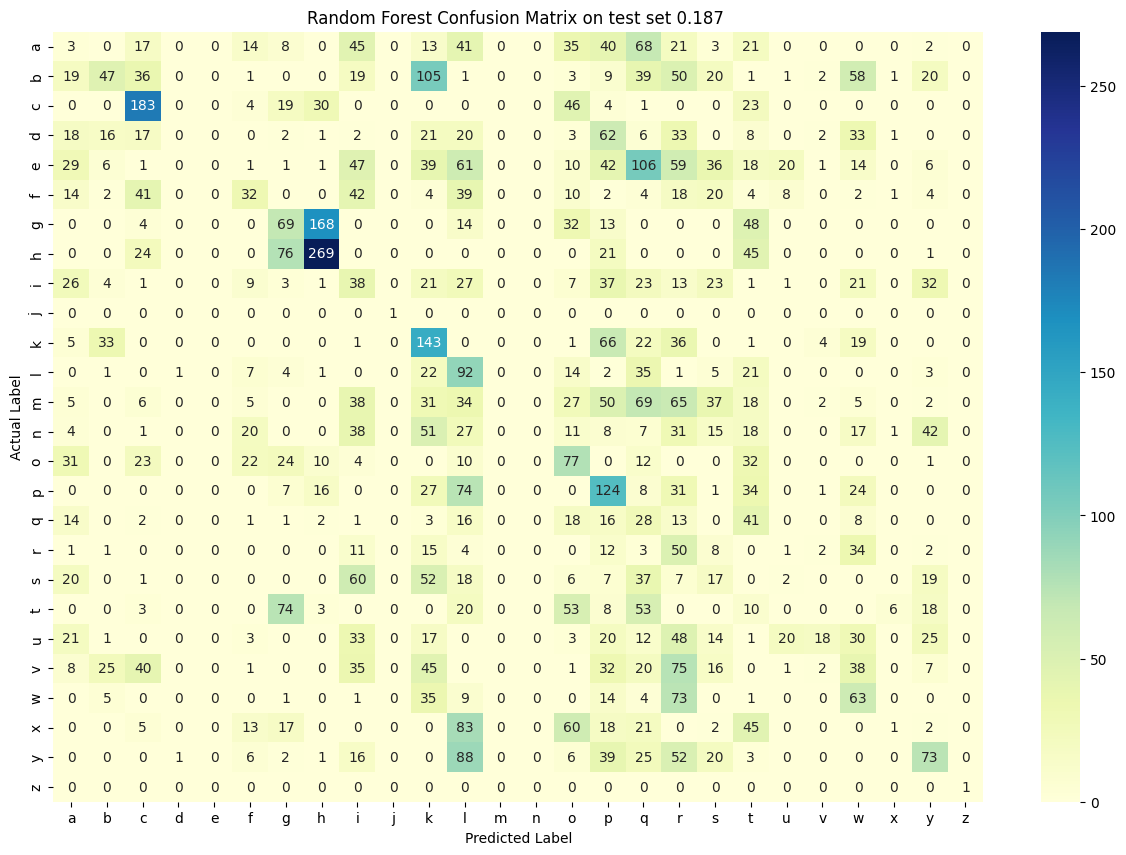

In [ ]:
# predict the performance
y_true = y_test
y_pred = lr.predict(x_test_pca)

# visualize confusion matrix
conf = confusion_matrix(y_true.T.to_list()+[9,25], list(y_pred)+[9,25])
conf = pd.DataFrame(conf)
conf.index = asl_char
conf.columns = asl_char
plt.figure(figsize=(15,10))
sns.heatmap(conf, annot = True, cmap = "YlGnBu", fmt = 'd')
accuracy = np.sum(y_true==y_pred)/y_pred.shape[0]
plt.title(f"Random Forest Confusion Matrix on test set {accuracy:.3f} ")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [ ]:
#Function for evaluating modle (acc, precision, recall, f1score, confusion metrix)

clf_report = pd.DataFrame(
    classification_report(y_true.T.to_list()+[9,25], list(y_pred)+[9,25],output_dict=True,target_names=asl_char)
    ).T
clf_report = clf_report.drop(["j","z"])

clf_report = clf_report.style.background_gradient(axis=0) 
clf_report


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
a,0.013761,0.009063,0.010929,331.000000
b,0.333333,0.108796,0.164049,432.000000
c,0.451852,0.590323,0.511888,310.000000
d,0.000000,0.000000,0.000000,245.000000
e,0.000000,0.000000,0.000000,498.000000
f,0.230216,0.129555,0.165803,247.000000
g,0.224026,0.198276,0.210366,348.000000
h,0.534791,0.616972,0.572950,436.000000
i,0.088167,0.131944,0.105702,288.000000
k,0.222050,0.432024,0.293333,331.000000


### Model2: Decision tree

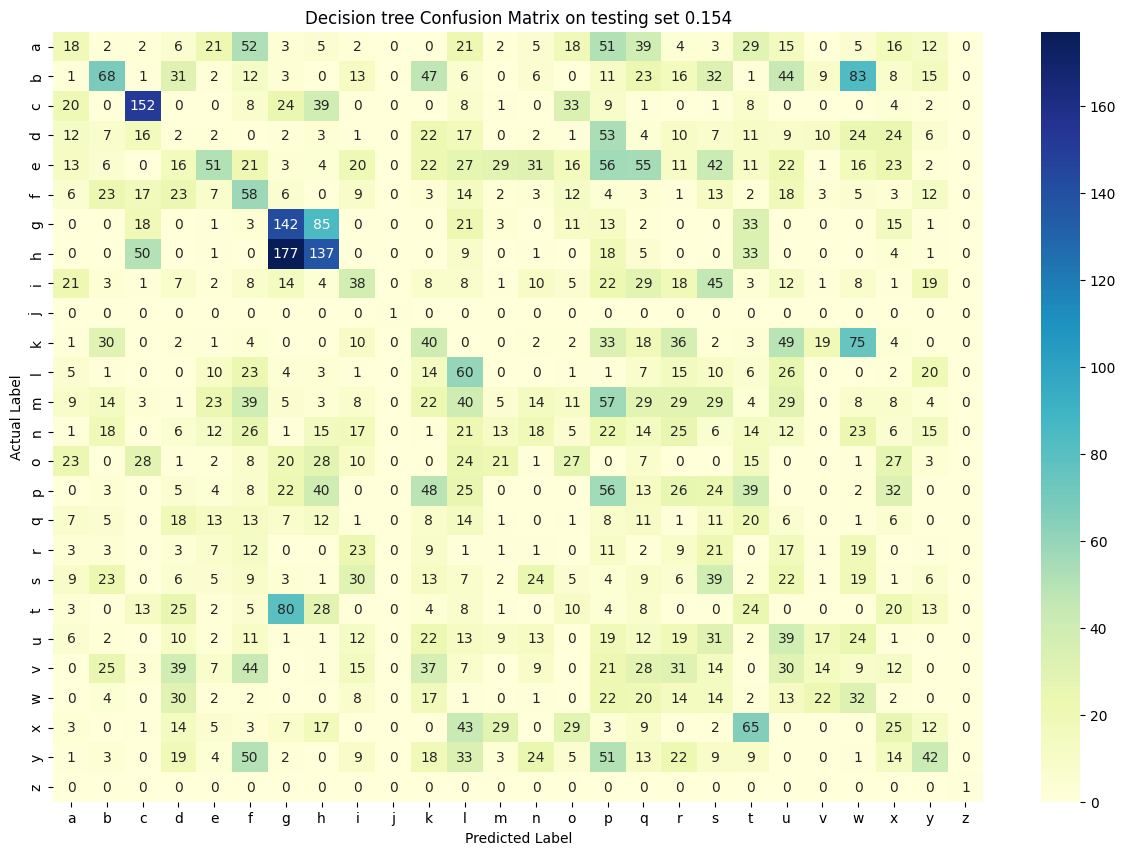

In [ ]:
# Prediction from Decision tree
y_true = y_test
y_pred = tree.predict(x_test_pca)

#Visualize the Confusion matrix for Decision tree

conf2 = confusion_matrix(y_true.T.to_list()+[9,25], list(y_pred)+[9,25])
conf2 = pd.DataFrame(conf2)
conf2.index = asl_char
conf2.columns = asl_char
plt.figure(figsize=(15,10))
sns.heatmap(conf2, annot = True, cmap = "YlGnBu", fmt = 'd')
accuracy = np.sum(y_true==y_pred)/y_pred.shape[0]

plt.title(f"Decision tree Confusion Matrix on testing set {accuracy:.3f}")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [ ]:
#Function for evaluating modle (acc, precision, recall, f1score, confusion metrix)
clf_report = pd.DataFrame(classification_report(y_true.T.to_list()+[9,25], list(y_pred)+[9,25],output_dict=True,target_names=asl_char)).T

clf_report = clf_report.drop(["j","z"])

clf_report = clf_report.style.background_gradient(axis=0) 
clf_report

,precision,recall,f1-score,support
a,0.111111,0.054381,0.073022,331.000000
b,0.283333,0.157407,0.202381,432.000000
c,0.498361,0.490323,0.494309,310.000000
d,0.007576,0.008163,0.007859,245.000000
e,0.274194,0.102410,0.149123,498.000000
f,0.138425,0.234818,0.174174,247.000000
g,0.269962,0.408046,0.324943,348.000000
h,0.321596,0.314220,0.317865,436.000000
i,0.167401,0.131944,0.147573,288.000000
k,0.112676,0.120846,0.116618,331.000000


<ipython-input-31-2e716ab92e35>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,5,i+1)


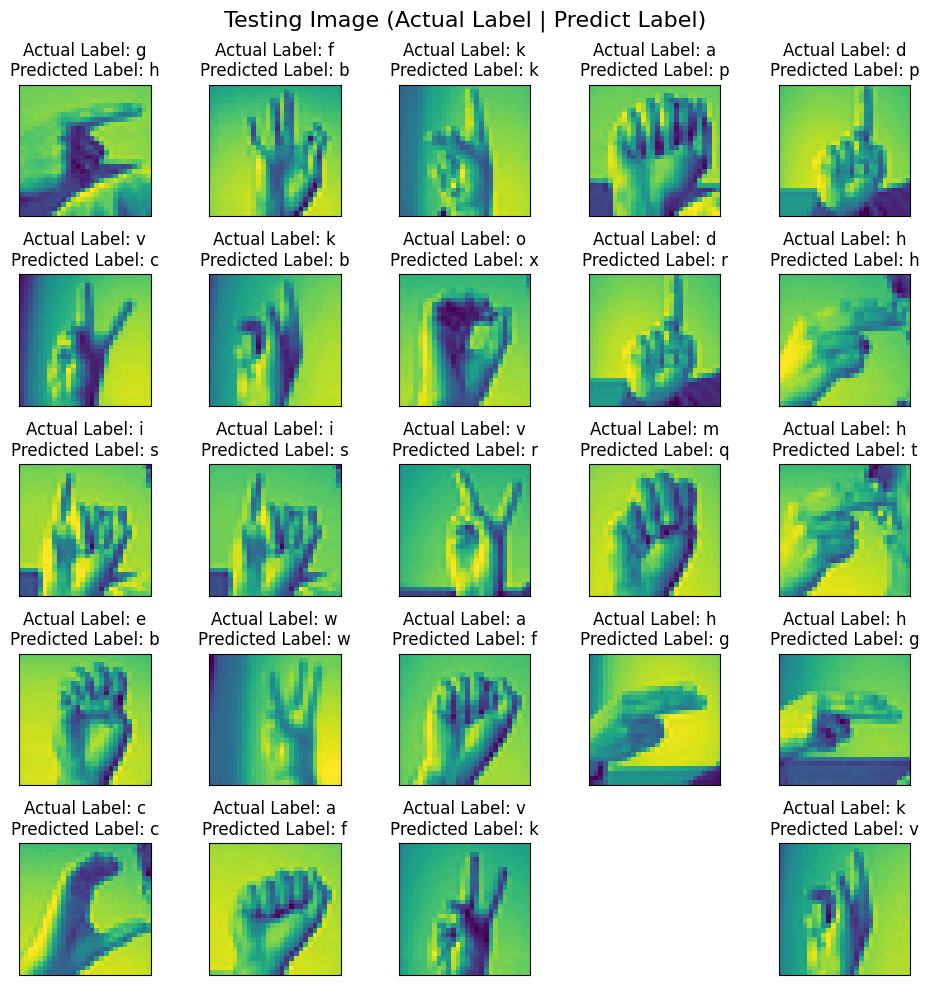

In [ ]:
#Plot the result on Testing
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})
fig.suptitle('Testing Image (Actual Label | Predict Label)', fontsize=16)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[i])
    plt.title(f"Actual Label: {asl_char[y_true[i]]}\nPredicted Label: {asl_char[y_pred[i]]}")
    plt.tight_layout()
plt.show()

### Get the overall images shapes by averaging

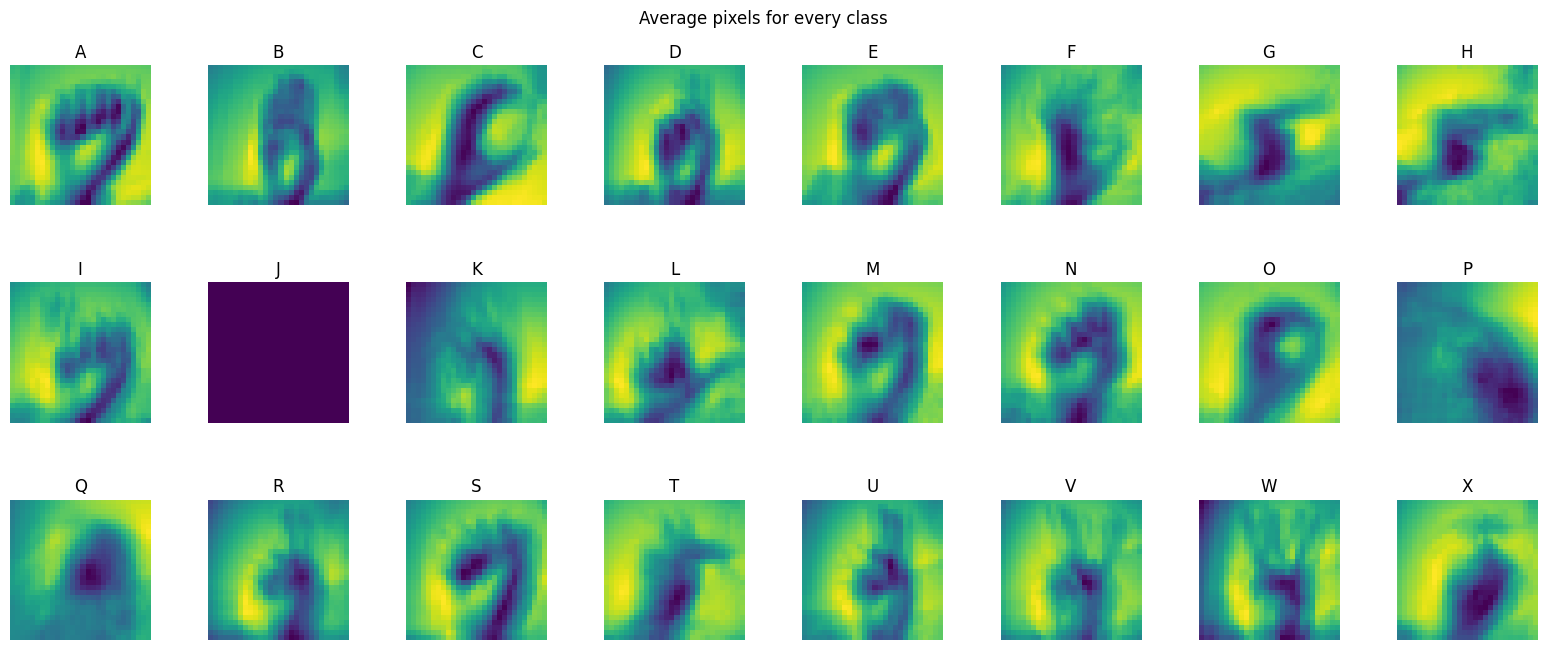

In [ ]:
# get average of every label
avg_img = dict()
for i in range(26):#26 characters
  avg_img[asl_char[i]] = np.zeros((28,28),float)
  if np.sum(train_label==i)!=0:
    avg_img[asl_char[i]] += train_images[train_label==i].mean(axis=0)
  avg_img[asl_char[i]] = avg_img[asl_char[i]]/255.0

raw_fig,axes = plt.subplots(3,8,figsize=(8*2,3*2+1))
plt.suptitle("Average pixels for every class")
plt.tight_layout()
for key,ax in zip(avg_img.keys(),axes.flatten()):
  ax.axis('off')
  ax.imshow(avg_img[key])
  ax.set_title(key.upper())